In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Read the CSV file
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


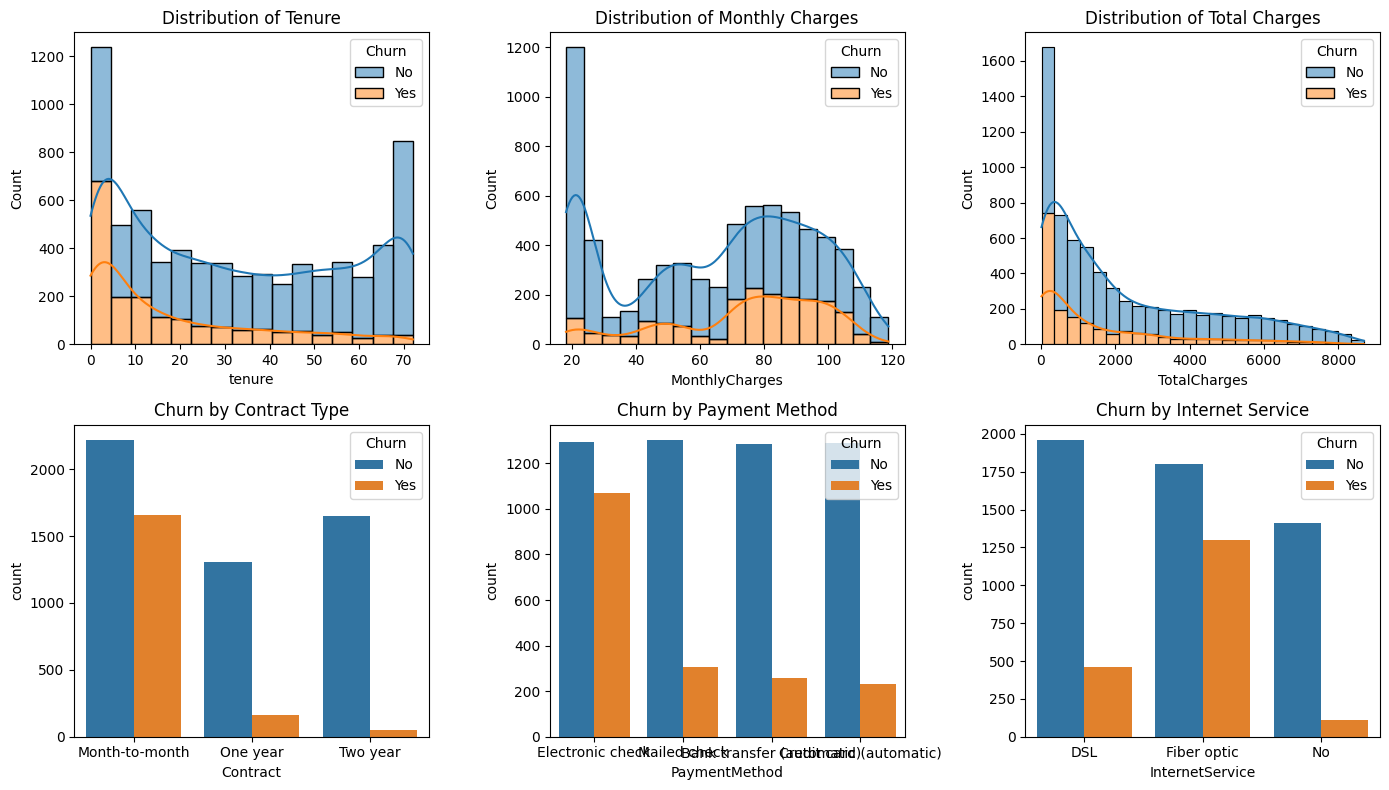

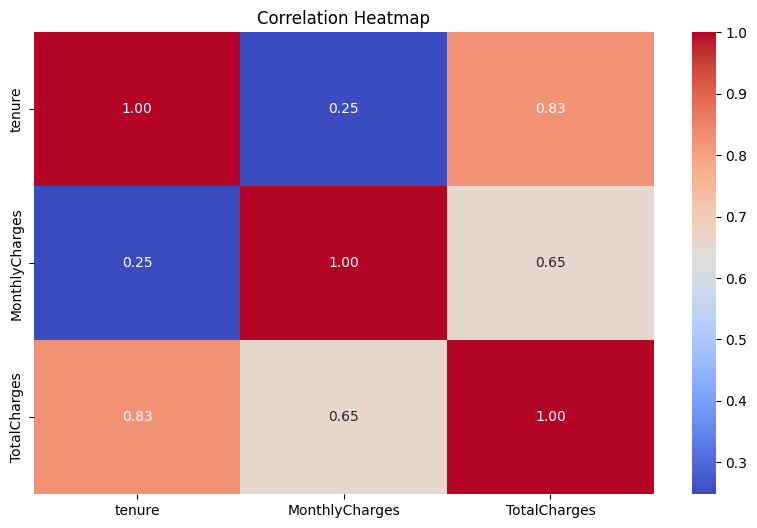

In [12]:
# Data Cleaning
# Convert 'TotalCharges' to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values by filling with median for 'TotalCharges'
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# Convert 'SeniorCitizen' to categorical
data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')

# Key Features Analysis
key_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'InternetService', 'Churn']

# Exploratory Data Analysis (EDA)
eda_data = data[key_features]

# Visualization
plt.figure(figsize=(14, 8))

# Distribution of tenure
plt.subplot(2, 3, 1)
sns.histplot(data=eda_data, x='tenure', kde=True, hue='Churn', multiple='stack')
plt.title('Distribution of Tenure')

# Distribution of MonthlyCharges
plt.subplot(2, 3, 2)
sns.histplot(data=eda_data, x='MonthlyCharges', kde=True, hue='Churn', multiple='stack')
plt.title('Distribution of Monthly Charges')

# Distribution of TotalCharges
plt.subplot(2, 3, 3)
sns.histplot(data=eda_data, x='TotalCharges', kde=True, hue='Churn', multiple='stack')
plt.title('Distribution of Total Charges')

# Churn by Contract Type
plt.subplot(2, 3, 4)
sns.countplot(data=eda_data, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')

# Churn by Payment Method
plt.subplot(2, 3, 5)
sns.countplot(data=eda_data, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')

# Churn by Internet Service
plt.subplot(2, 3, 6)
sns.countplot(data=eda_data, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')

plt.tight_layout()
plt.show()

# Correlation Heatmap for numerical columns only
plt.figure(figsize=(10, 6))
numerical_data = eda_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
# Encode categorical variables
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

# Select features and target variable
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen']
X = data[features]
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_test, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return accuracy, precision, recall, f1, roc_auc

# Logistic Regression evaluation
log_reg_proba = log_reg.predict_proba(X_test)[:, 1]
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg, log_reg_proba)

# SVM evaluation
svm_proba = svm_model.predict_proba(X_test)[:, 1]
svm_metrics = evaluate_model(y_test, y_pred_svm, svm_proba)

# Print evaluation metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_metrics[0]:.2f}")
print(f"Precision: {log_reg_metrics[1]:.2f}")
print(f"Recall: {log_reg_metrics[2]:.2f}")
print(f"F1 Score: {log_reg_metrics[3]:.2f}")
print(f"ROC-AUC: {log_reg_metrics[4]:.2f}")

print("\nSVM Metrics:")
print(f"Accuracy: {svm_metrics[0]:.2f}")
print(f"Precision: {svm_metrics[1]:.2f}")
print(f"Recall: {svm_metrics[2]:.2f}")
print(f"F1 Score: {svm_metrics[3]:.2f}")
print(f"ROC-AUC: {svm_metrics[4]:.2f}")

# Print classification reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))



Logistic Regression Metrics:
Accuracy: 0.81
Precision: 0.66
Recall: 0.54
F1 Score: 0.59
ROC-AUC: 0.85

SVM Metrics:
Accuracy: 0.81
Precision: 0.69
Recall: 0.52
F1 Score: 0.59
ROC-AUC: 0.82

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

